In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import numpy.random as random
import scipy
from neuron import Neuron, Log
from simulation import Simulator
from util import get_combinations
from collections import namedtuple
from collections import OrderedDict
from plot import *
import pickle
from tqdm import tqdm
from matplotlib import cm
plt.rcParams.update({'font.size': 12})


## 5.1

In [2]:
with open('../final_data/simple_example_all_default_block-0.pkl', 'rb') as f:
    block0 = pickle.load(f)
with open('../final_data/simple_example_all_default_block-1.pkl', 'rb') as f:
    block1 = pickle.load(f)
with open('../final_data/simple_example_all_default_block-2.pkl', 'rb') as f:
    block2 = pickle.load(f)
with open('../final_data/simple_example_all_default_ou-0.pkl', 'rb') as f:
    ou0 = pickle.load(f)
with open('../final_data/simple_example_all_default_ou-1.pkl', 'rb') as f:
    ou1 = pickle.load(f)
with open('../final_data/simple_example_all_default_ou-2.pkl', 'rb') as f:
    ou2 = pickle.load(f)

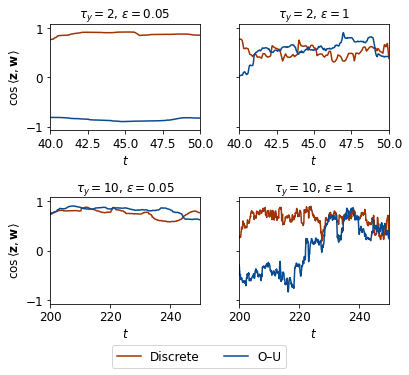

In [14]:
blocks = (20,25)

neuron = block1[0]

sigma_s, epsilon, sigma_y, tau_y = env_extract(neuron)

cm_section = np.linspace(0.9, 1, neuron.S)
colors = [ cm.Oranges(x) for x in cm_section ]

fig, axs = plt.subplots(len(tau_y), len(epsilon), squeeze=True, figsize=(3*len(epsilon),2.25*len(tau_y)+0.5), sharey=True)

for log in neuron.logs:
    i = tau_y.index(log.env_parameters['tau_y'])
    j = epsilon.index(log.env_parameters['epsilon'])
    x_low = blocks[0] * tau_y[i]
    x_up = blocks[1] * tau_y[i]
    for k in np.arange(0, neuron.S, 1):
        if i == 0 and j == 0:        
            axs[i, j].plot(
                log.timeline, 
                (log.W[:, [k], :] @ log.z / (np.sqrt(log.W[:, [k], :] @ np.transpose(log.W[:, [k], :], (0,2,1))) * np.sqrt(np.transpose(log.z, (0,2,1)) @ log.z))).squeeze(), 
                # (neuron.po.T[None, :, :] @ log.W @ log.z / (np.sqrt(neuron.po.T[None, :, :] @ log.W @ np.transpose(neuron.po.T[None, :, :] @ log.W, (0,2,1))) * np.sqrt(np.transpose(log.z, (0,2,1)) @ log.z))).squeeze(),
                color = colors[k],
                label = 'Discrete'
            )
        else:
            axs[i, j].plot(
                log.timeline, 
                (log.W[:, [k], :] @ log.z / (np.sqrt(log.W[:, [k], :] @ np.transpose(log.W[:, [k], :], (0,2,1))) * np.sqrt(np.transpose(log.z, (0,2,1)) @ log.z))).squeeze(), 
                # (neuron.po.T[None, :, :] @ log.W @ log.z / (np.sqrt(neuron.po.T[None, :, :] @ log.W @ np.transpose(neuron.po.T[None, :, :] @ log.W, (0,2,1))) * np.sqrt(np.transpose(log.z, (0,2,1)) @ log.z))).squeeze(),
                color = colors[k],
            )
    axs[i, j].set_xlabel('$t$')
    axs[i, j].set_title('$\\tau_y = {}$, $\epsilon = {}$'.format(tau_y[i], epsilon[j]), fontsize=12)
    
    # tag_R_E(axs[i, j], log, x_low, x_up)
    
    axs[i, j].set_xlim(x_low, x_up)
    if j == 0:
        axs[i, j].set_ylabel('$\cos\langle\mathbf{{z}},\mathbf{{w}}\\rangle$')
        # if i == 0:
        #     axs[i, j].legend(loc="upper left")

neuron = ou1[0]
colors = [ cm.Blues(x) for x in cm_section ]

for log in neuron.logs:
    i = tau_y.index(log.env_parameters['tau_y'])
    j = epsilon.index(log.env_parameters['epsilon'])
    x_low = blocks[0] * tau_y[i]
    x_up = blocks[1] * tau_y[i]
    for k in np.arange(0, neuron.S, 1):
        if i == 0 and j == 0:        
            axs[i, j].plot(
                log.timeline, 
                (log.W[:, [k], :] @ log.z / (np.sqrt(log.W[:, [k], :] @ np.transpose(log.W[:, [k], :], (0,2,1))) * np.sqrt(np.transpose(log.z, (0,2,1)) @ log.z))).squeeze(), 
                # (neuron.po.T[None, :, :] @ log.W @ log.z / (np.sqrt(neuron.po.T[None, :, :] @ log.W @ np.transpose(neuron.po.T[None, :, :] @ log.W, (0,2,1))) * np.sqrt(np.transpose(log.z, (0,2,1)) @ log.z))).squeeze(),
                color = colors[k],
                label = 'O–U'
            )
        else:
            axs[i, j].plot(
                log.timeline, 
                (log.W[:, [k], :] @ log.z / (np.sqrt(log.W[:, [k], :] @ np.transpose(log.W[:, [k], :], (0,2,1))) * np.sqrt(np.transpose(log.z, (0,2,1)) @ log.z))).squeeze(), 
                # (neuron.po.T[None, :, :] @ log.W @ log.z / (np.sqrt(neuron.po.T[None, :, :] @ log.W @ np.transpose(neuron.po.T[None, :, :] @ log.W, (0,2,1))) * np.sqrt(np.transpose(log.z, (0,2,1)) @ log.z))).squeeze(),
                color = colors[k],
            )
    
    axs[i, j].set_xlim(x_low, x_up)
    if j == 0:
        axs[i, j].set_ylabel('$\cos\langle\mathbf{{z}},\mathbf{{w}}\\rangle$')
        # if i == 0:
        #     axs[i, j].legend(loc="upper left")
        # if i == 1:
        #     axs[i, j].legend(loc='upper center', bbox_to_anchor=(1, -0.05),
        #         fancybox=True, shadow=False, ncol=5)

fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0.04),
          fancybox=True, shadow=False, ncol=2)

fig.tight_layout()
plt.show()


In [15]:
neuron.timescales_whole(log=neuron.logs[0])

array([[0.99750623-0.00000000e+00j],
       [2.        -0.00000000e+00j],
       [2.        -0.00000000e+00j],
       [2.        -0.00000000e+00j],
       [2.        -0.00000000e+00j],
       [2.        -0.00000000e+00j],
       [2.        +9.16596347e-18j],
       [2.        -9.16596347e-18j],
       [2.        -0.00000000e+00j],
       [2.        -0.00000000e+00j]])

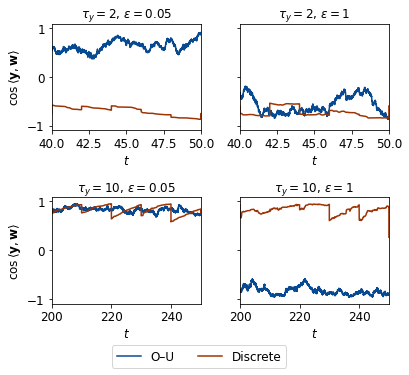

In [8]:

blocks=(20, 25)

neuron = ou2[0]
sigma_s, epsilon, sigma_y, tau_y = env_extract(neuron)
cm_section = np.linspace(0.9, 1, neuron.S)


fig, axs = plt.subplots(len(tau_y), len(epsilon), squeeze=True, figsize=(3*len(epsilon),2.25*len(tau_y)+0.5), sharey=True)


colors = [ cm.Blues(x) for x in cm_section ]

for log in neuron.logs:
    i = tau_y.index(log.env_parameters['tau_y'])
    j = epsilon.index(log.env_parameters['epsilon'])
    x_low = blocks[0] * tau_y[i]
    x_up = blocks[1] * tau_y[i]
    for k in np.arange(0, neuron.S, 1):
        if i == 0 and j == 0:        
            axs[i, j].plot(
                log.timeline, 
                (log.W[:, [k], :] @ log.y / (np.sqrt(log.W[:, [k], :] @ np.transpose(log.W[:, [k], :], (0,2,1))) * np.sqrt(np.transpose(log.y, (0,2,1)) @ log.y))).squeeze(), 
                # (neuron.po.T[None, :, :] @ log.W @ log.y / (np.sqrt(neuron.po.T[None, :, :] @ log.W @ np.transpose(neuron.po.T[None, :, :] @ log.W, (0,2,1))) * np.sqrt(np.transpose(log.y, (0,2,1)) @ log.y))).squeeze(),
                color = colors[k],
                label = 'O–U'
            )
        else:
            axs[i, j].plot(
                log.timeline, 
                (log.W[:, [k], :] @ log.y / (np.sqrt(log.W[:, [k], :] @ np.transpose(log.W[:, [k], :], (0,2,1))) * np.sqrt(np.transpose(log.y, (0,2,1)) @ log.y))).squeeze(), 
                # (neuron.po.T[None, :, :] @ log.W @ log.y / (np.sqrt(neuron.po.T[None, :, :] @ log.W @ np.transpose(neuron.po.T[None, :, :] @ log.W, (0,2,1))) * np.sqrt(np.transpose(log.y, (0,2,1)) @ log.y))).squeeze(),
                color = colors[k],
            )
    
    axs[i, j].set_xlim(x_low, x_up)
    if j == 0:
        axs[i, j].set_ylabel('$\cos\langle\mathbf{{y}},\mathbf{{w}}\\rangle$')
        # if i == 0:
        #     axs[i, j].legend(loc="upper left")
        # if i == 1:
        #     axs[i, j].legend(loc='upper center', bbox_to_anchor=(1, -0.05),
        #         fancybox=True, shadow=False, ncol=5)

neuron = block2[0]
colors = [ cm.Oranges(x) for x in cm_section ]

for log in neuron.logs:
    i = tau_y.index(log.env_parameters['tau_y'])
    j = epsilon.index(log.env_parameters['epsilon'])
    x_low = blocks[0] * tau_y[i]
    x_up = blocks[1] * tau_y[i]
    for k in np.arange(0, neuron.S, 1):
        if i == 0 and j == 0:        
            axs[i, j].plot(
                log.timeline, 
                (log.W[:, [k], :] @ log.y / (np.sqrt(log.W[:, [k], :] @ np.transpose(log.W[:, [k], :], (0,2,1))) * np.sqrt(np.transpose(log.y, (0,2,1)) @ log.y))).squeeze(), 
                # (neuron.po.T[None, :, :] @ log.W @ log.y / (np.sqrt(neuron.po.T[None, :, :] @ log.W @ np.transpose(neuron.po.T[None, :, :] @ log.W, (0,2,1))) * np.sqrt(np.transpose(log.y, (0,2,1)) @ log.y))).squeeze(),
                color = colors[k],
                label = 'Discrete'
            )
        else:
            axs[i, j].plot(
                log.timeline, 
                (log.W[:, [k], :] @ log.y / (np.sqrt(log.W[:, [k], :] @ np.transpose(log.W[:, [k], :], (0,2,1))) * np.sqrt(np.transpose(log.y, (0,2,1)) @ log.y))).squeeze(), 
                # (neuron.po.T[None, :, :] @ log.W @ log.y / (np.sqrt(neuron.po.T[None, :, :] @ log.W @ np.transpose(neuron.po.T[None, :, :] @ log.W, (0,2,1))) * np.sqrt(np.transpose(log.y, (0,2,1)) @ log.y))).squeeze(),
                color = colors[k],
            )
    axs[i, j].set_xlabel('$t$')
    axs[i, j].set_title('$\\tau_y = {}$, $\epsilon = {}$'.format(tau_y[i], epsilon[j]), fontsize=12)
    
    # tag_R_E(axs[i, j], log, x_low, x_up)
    
    axs[i, j].set_xlim(x_low, x_up)
    if j == 0:
        axs[i, j].set_ylabel('$\cos\langle\mathbf{{y}},\mathbf{{w}}\\rangle$')
        # if i == 0:
        #     axs[i, j].legend(loc="upper left")



fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0.04),
          fancybox=True, shadow=False, ncol=2)

fig.tight_layout()
plt.show()


In [9]:
fig.savefig('../final_figure/5.1-2.pdf', bbox_inches='tight')

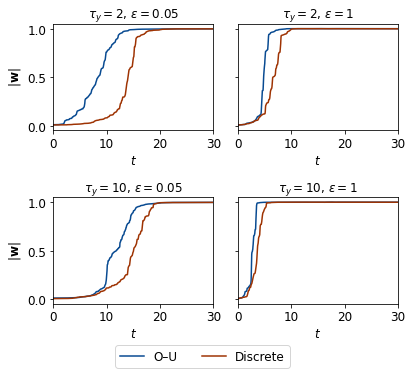

In [117]:

blocks=(0,30)


sigma_s, epsilon, sigma_y, tau_y = env_extract(neuron)
cm_section = np.linspace(0.9, 1, neuron.S)


fig, axs = plt.subplots(len(tau_y), len(epsilon), squeeze=True, figsize=(3*len(epsilon),2.25*len(tau_y)+0.5), sharey=True)

neuron = ou1[0]
colors = [ cm.Blues(x) for x in cm_section ]

for log in neuron.logs:
    i = tau_y.index(log.env_parameters['tau_y'])
    j = epsilon.index(log.env_parameters['epsilon'])
    x_low = blocks[0] * tau_y[i]
    x_up = blocks[1] * tau_y[i]
    for k in np.arange(0, neuron.S, 1):
        if i == 0 and j == 0:        
            axs[i, j].plot(
                log.timeline, 
                (np.sqrt(log.W[:, [0], :] @ np.transpose(log.W[:, [0], :], (0,2,1)))).squeeze(), 
                # (neuron.po.T[None, :, :] @ log.W @ log.y / (np.sqrt(neuron.po.T[None, :, :] @ log.W @ np.transpose(neuron.po.T[None, :, :] @ log.W, (0,2,1))) * np.sqrt(np.transpose(log.y, (0,2,1)) @ log.y))).squeeze(),
                color = colors[k],
                label = 'O–U'
            )
        else:
            axs[i, j].plot(
                log.timeline, 
                (np.sqrt(log.W[:, [0], :] @ np.transpose(log.W[:, [0], :], (0,2,1)))).squeeze(), 
                # (neuron.po.T[None, :, :] @ log.W @ log.y / (np.sqrt(neuron.po.T[None, :, :] @ log.W @ np.transpose(neuron.po.T[None, :, :] @ log.W, (0,2,1))) * np.sqrt(np.transpose(log.y, (0,2,1)) @ log.y))).squeeze(),
                color = colors[k],
            )
    
    axs[i, j].set_xlim(0, 100)
    if j == 0:
        axs[i, j].set_ylabel('$| \mathbf{{w}} |$')
        # if i == 0:
        #     axs[i, j].legend(loc="upper left")
        # if i == 1:
        #     axs[i, j].legend(loc='upper center', bbox_to_anchor=(1, -0.05),
        #         fancybox=True, shadow=False, ncol=5)

neuron = block1[0]
colors = [ cm.Oranges(x) for x in cm_section ]

for log in neuron.logs:
    i = tau_y.index(log.env_parameters['tau_y'])
    j = epsilon.index(log.env_parameters['epsilon'])
    x_low = blocks[0] * tau_y[i]
    x_up = blocks[1] * tau_y[i]
    for k in np.arange(0, neuron.S, 1):
        if i == 0 and j == 0:        
            axs[i, j].plot(
                log.timeline, 
                (np.sqrt(log.W[:, [0], :] @ np.transpose(log.W[:, [0], :], (0,2,1)))).squeeze(), 
                # (neuron.po.T[None, :, :] @ log.W @ log.y / (np.sqrt(neuron.po.T[None, :, :] @ log.W @ np.transpose(neuron.po.T[None, :, :] @ log.W, (0,2,1))) * np.sqrt(np.transpose(log.y, (0,2,1)) @ log.y))).squeeze(),
                color = colors[k],
                label = 'Discrete'
            )
        else:
            axs[i, j].plot(
                log.timeline, 
                (np.sqrt(log.W[:, [0], :] @ np.transpose(log.W[:, [0], :], (0,2,1)))).squeeze(), 
                # (neuron.po.T[None, :, :] @ log.W @ log.y / (np.sqrt(neuron.po.T[None, :, :] @ log.W @ np.transpose(neuron.po.T[None, :, :] @ log.W, (0,2,1))) * np.sqrt(np.transpose(log.y, (0,2,1)) @ log.y))).squeeze(),
                color = colors[k],
            )
    axs[i, j].set_xlabel('$t$')
    axs[i, j].set_title('$\\tau_y = {}$, $\epsilon = {}$'.format(tau_y[i], epsilon[j]), fontsize=12)
    
    # tag_R_E(axs[i, j], log, x_low, x_up)
    
    axs[i, j].set_xlim(0, 30)
    if j == 0:
        axs[i, j].set_ylabel('$| \mathbf{{w}} |$')
        # if i == 0:
        #     axs[i, j].legend(loc="upper left")



fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0.04),
          fancybox=True, shadow=False, ncol=2)

fig.tight_layout()
plt.show()


In [91]:
fig.savefig('../final_figure/5.1-3.pdf', bbox_inches='tight')

## 5.2

In [54]:
with open('../final_data/verification_single_block.pkl', 'rb') as f:
    single_block = pickle.load(f)

In [55]:
neuron = single_block[0]
log = neuron.logs[0]

In [48]:
neuron

Properties: {'N': 10, 'S': 5, 'tau_W': 1, 'beta': 1, 'gamma': 1, 'phi': 100, 'psi': 100, 'n_C': 2, 'n_g': 2, 'alpha': 1}.
Trials: 
0: {'sigma_s': 1, 'epsilon': 0.1, 'sigma_y': 1, 'tau_u': 0.1, 'tau_y': 1000, 'tau_z': None, 'u_mode': 'block', 'y_mode': 'block', 'z_mode': 'block', 'T': 1000, 'dt': 0.002}. 

In [42]:
lambda1 = log.env_parameters['sigma_s'] ** 2 + log.env_parameters['epsilon'] ** 2
lambda1
chi = 1 / (neuron.po.T @ np.linalg.inv(neuron.L) @ neuron.pi).squeeze()
chi
ko = np.sqrt(1/neuron.alpha * (1 + chi/lambda1))
ko
k = ko * chi * np.linalg.inv(neuron.L) @ neuron.pi
k
y = log.y[-1]
y
W_ast = k @ y.T
W_ast

array([[ 0.86048964, -0.11199642, -0.16773302,  0.17640957,  0.10615126,
        -0.07201511,  0.10456189, -0.1674274 ,  0.20354108, -0.28783122],
       [ 0.83273191, -0.10838363, -0.16232227,  0.17071893,  0.10272703,
        -0.06969204,  0.10118892, -0.16202652,  0.19697524, -0.27854634],
       [ 0.77721645, -0.10115805, -0.15150079,  0.15933767,  0.09587856,
        -0.06504591,  0.094443  , -0.15122475,  0.18384356, -0.25997658],
       [ 0.66618553, -0.0867069 , -0.12985782,  0.13657515,  0.08218162,
        -0.05575363,  0.08095114, -0.12962121,  0.15758019, -0.22283707],
       [ 0.44412368, -0.0578046 , -0.08657188,  0.0910501 ,  0.05478775,
        -0.03716909,  0.05396743, -0.08641414,  0.10505346, -0.14855805]])

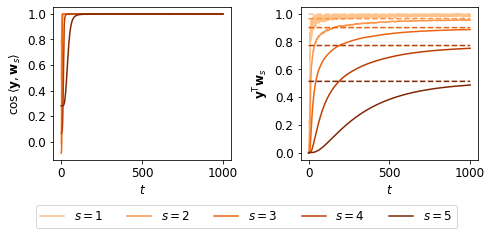

In [71]:
blocks=(20,30)

neuron = single_block[0]

sigma_s, epsilon, sigma_y, tau_y = env_extract(neuron)
cm_section = np.linspace(0.3, 1, neuron.S)


fig, axs = plt.subplots(1, 2, squeeze=True, figsize=(7, 3))



colors = [ cm.Oranges(x) for x in cm_section ]

for log in neuron.logs:
    i = tau_y.index(log.env_parameters['tau_y'])
    j = epsilon.index(log.env_parameters['epsilon'])
    x_low = blocks[0] * tau_y[i]
    x_up = blocks[1] * tau_y[i]
    for k in np.arange(0, neuron.S, 1):
        if i == 0 and j == 0:        
            axs[0].plot(
                log.timeline, 
                -(log.W[:, [k], :] @ log.y / (np.sqrt(log.W[:, [k], :] @ np.transpose(log.W[:, [k], :], (0,2,1))) * np.sqrt(np.transpose(log.y, (0,2,1)) @ log.y))).squeeze(), 
                # (neuron.po.T[None, :, :] @ log.W @ log.y / (np.sqrt(neuron.po.T[None, :, :] @ log.W @ np.transpose(neuron.po.T[None, :, :] @ log.W, (0,2,1))) * np.sqrt(np.transpose(log.y, (0,2,1)) @ log.y))).squeeze(),
                color = colors[k],
                label = '$s={k}$'.format(k=k+1)
            )
        else:
            axs[0].plot(
                log.timeline, 
                -(log.W[:, [k], :] @ log.y / (np.sqrt(log.W[:, [k], :] @ np.transpose(log.W[:, [k], :], (0,2,1))) * np.sqrt(np.transpose(log.y, (0,2,1)) @ log.y))).squeeze(), 
                # (neuron.po.T[None, :, :] @ log.W @ log.y / (np.sqrt(neuron.po.T[None, :, :] @ log.W @ np.transpose(neuron.po.T[None, :, :] @ log.W, (0,2,1))) * np.sqrt(np.transpose(log.y, (0,2,1)) @ log.y))).squeeze(),
                color = colors[k],
            )
    axs[0].set_xlabel('$t$')
    # axs[0].set_title('$\\tau_y = {}$, $\epsilon = {}$'.format(tau_y[i], epsilon[j]), fontsize=12)
    
    # tag_R_E(axs[0], log, x_low, x_up)
    
    # axs[0].set_xlim(x_low, x_up)
    if j == 0:
        axs[0].set_ylabel('$\cos\langle\mathbf{{y}},\mathbf{{w}}_s\\rangle$')
        # if i == 0:
        #     axs[i, j].legend(loc="upper left")


for k in range(neuron.S):
    axs[1].plot(
        log.timeline, 
        -(log.W[:, [k], :] @ log.y).squeeze(),
        color = oranges[k],
        # label = '$s = {k}$'.format(k=k+1)
    )

    # axs[1].plot(
    #     log.timeline, 
    #     (log.W[:, [k], :] @ log.orthog).squeeze(), 
    #     color = blues[k],
    #     # label = '$\mathbf{{w}}_{{{k}}}$'.format(k=k+1)
    # )

    axs[1].plot(
        log.timeline, 
        (W_ast @ y)[k, 0] * np.ones(log.timeline.shape),
        '--', 
        color = oranges[k],
        # label = '$\mathbf{{w}}_{{{k}}}$'.format(k=k+1)
    )

axs[1].set_xlabel('$t$')
axs[1].set_ylabel('$\mathbf{{y}}^{\mathrm{T}}\mathbf{{w}}_s$')
 
# axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0.05),
          fancybox=True, shadow=False, ncol=5)
fig.tight_layout()
plt.show()


In [72]:
fig.savefig('../final_figure/5.2-1.pdf', bbox_inches='tight')

In [6]:
with open('../final_data/og_complex_example_all_default_block-0.pkl', 'rb') as f:
    og_block = pickle.load(f)
# with open('../final_data/og_complex_example_all_default_ou-0.pkl', 'rb') as f:
#     og_ou = pickle.load(f)

In [7]:
neuron = og_block[0]
neuron.L

array([[-0.5       ,  0.5       ,  0.        ,  0.        ,  0.        ],
       [ 0.25      , -0.375     ,  0.125     ,  0.        ,  0.        ],
       [ 0.        ,  0.0625    , -0.09375   ,  0.03125   ,  0.        ],
       [ 0.        ,  0.        ,  0.015625  , -0.0234375 ,  0.0078125 ],
       [ 0.        ,  0.        ,  0.        ,  0.00390625, -0.00585938]])

In [8]:
neuron.pi

array([[9.99954600e-01],
       [4.53978686e-05],
       [2.06106005e-09],
       [9.35719813e-14],
       [4.24816138e-18]])

In [9]:
neuron.po

array([[0.05801222],
       [0.09564598],
       [0.15769356],
       [0.25999272],
       [0.42865553]])

In [13]:
P = neuron.pi @ neuron.po.T
P

array([[5.80095836e-02, 9.56416345e-02, 1.57686397e-01, 2.59980917e-01,
        4.28636068e-01],
       [2.63363102e-06, 4.34212349e-06, 7.15895135e-06, 1.18031154e-05,
        1.94600474e-05],
       [1.19566663e-10, 1.97132101e-10, 3.25015889e-10, 5.35860609e-10,
        8.83484784e-10],
       [5.42831812e-15, 8.94978355e-15, 1.47556985e-14, 2.43280340e-14,
        4.01101471e-14],
       [2.46445262e-19, 4.06319545e-19, 6.69907676e-19, 1.10449104e-18,
        1.82099786e-18]])

In [14]:
Li = neuron.L - P
Li

array([[-5.58009584e-01,  4.04358366e-01, -1.57686397e-01,
        -2.59980917e-01, -4.28636068e-01],
       [ 2.49997366e-01, -3.75004342e-01,  1.24992841e-01,
        -1.18031154e-05, -1.94600474e-05],
       [-1.19566663e-10,  6.24999998e-02, -9.37500003e-02,
         3.12499995e-02, -8.83484784e-10],
       [-5.42831812e-15, -8.94978355e-15,  1.56250000e-02,
        -2.34375000e-02,  7.81250000e-03],
       [-2.46445262e-19, -4.06319545e-19, -6.69907676e-19,
         3.90625000e-03, -5.85937500e-03]])

In [15]:
-1 / np.linalg.eigvals(Li)

array([  1.24006443,   6.18052751,  18.1080774 ,  39.72101674,
       134.17345799])

In [12]:
neuron.timescales_whole(log=neuron.logs[1])

array([[  0.40057794,   2.88735777,  13.79291403,  59.67180083,
        291.02492051],
       [  0.63230441,   3.27298319,  14.54908023,  61.18853736,
        295.64868162],
       [  0.63230441,   3.27298319,  14.54908023,  61.18853736,
        295.64868162],
       [  0.63230441,   3.27298319,  14.54908023,  61.18853736,
        295.64868162],
       [  0.63230441,   3.27298319,  14.54908023,  61.18853736,
        295.64868162],
       [  0.63230441,   3.27298319,  14.54908023,  61.18853736,
        295.64868162],
       [  0.63230441,   3.27298319,  14.54908023,  61.18853736,
        295.64868162],
       [  0.63230441,   3.27298319,  14.54908023,  61.18853736,
        295.64868162],
       [  0.63230441,   3.27298319,  14.54908023,  61.18853736,
        295.64868162],
       [  0.63230441,   3.27298319,  14.54908023,  61.18853736,
        295.64868162]])

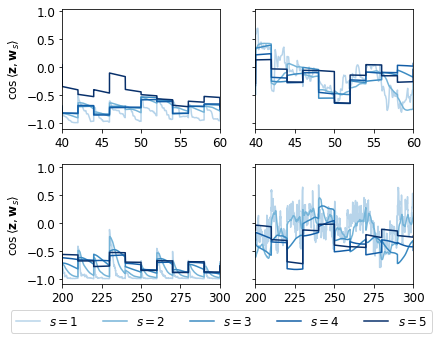

In [76]:
blocks=(20,30)


neuron = og_block[0]
cm_section = np.linspace(0.3, 1, neuron.S)
sigma_s, epsilon, sigma_y, tau_y = env_extract(neuron)
colors = [ cm.Blues(x) for x in cm_section ]

fig, axs = plt.subplots(len(tau_y), len(epsilon), squeeze=True, figsize=(3*len(epsilon),2.25*len(tau_y)), sharey=True)

for log in neuron.logs:
    i = tau_y.index(log.env_parameters['tau_y'])
    j = epsilon.index(log.env_parameters['epsilon'])
    x_low = blocks[0] * tau_y[i]
    x_up = blocks[1] * tau_y[i]
    for k in np.arange(0, neuron.S, 1):
        if i == 0 and j == 0:        
            axs[i, j].plot(
                log.timeline, 
                (log.W[:, [k], :] @ log.y / (np.sqrt(log.W[:, [k], :] @ np.transpose(log.W[:, [k], :], (0,2,1))) * np.sqrt(np.transpose(log.y, (0,2,1)) @ log.y))).squeeze(), 
                # (neuron.po.T[None, :, :] @ log.W @ log.y / (np.sqrt(neuron.po.T[None, :, :] @ log.W @ np.transpose(neuron.po.T[None, :, :] @ log.W, (0,2,1))) * np.sqrt(np.transpose(log.y, (0,2,1)) @ log.y))).squeeze(),
                color = colors[k],
                label = '$s={k}$'.format(k=k+1)
            )
        else:
            axs[i, j].plot(
                log.timeline, 
                (log.W[:, [k], :] @ log.y / (np.sqrt(log.W[:, [k], :] @ np.transpose(log.W[:, [k], :], (0,2,1))) * np.sqrt(np.transpose(log.y, (0,2,1)) @ log.y))).squeeze(), 
                # (neuron.po.T[None, :, :] @ log.W @ log.y / (np.sqrt(neuron.po.T[None, :, :] @ log.W @ np.transpose(neuron.po.T[None, :, :] @ log.W, (0,2,1))) * np.sqrt(np.transpose(log.y, (0,2,1)) @ log.y))).squeeze(),
                color = colors[k],
            )
    
    axs[i, j].set_xlim(x_low, x_up)
    if j == 0:
        axs[i, j].set_ylabel('$\cos\langle\mathbf{{y}},\mathbf{{w}}_s\\rangle$')
        # if i == 0:
        #     axs[i, j].legend(loc="upper left")
        # if i == 1:
        #     axs[i, j].legend(loc='upper center', bbox_to_anchor=(1, -0.05),
        #         fancybox=True, shadow=False, ncol=5)


# colors = [ cm.Oranges(x) for x in cm_section ]
# neuron = og_block[0]
# sigma_s, epsilon, sigma_y, tau_y = env_extract(neuron)

# for log in neuron.logs:
#     i = tau_y.index(log.env_parameters['tau_y'])
#     j = epsilon.index(log.env_parameters['epsilon'])
#     # x_low = blocks[0] * tau_y[i]
#     # x_up = blocks[1] * tau_y[i]
#     for k in np.arange(0, neuron.S, 1):
#         if i == 0 and j == 0:        
#             axs[i, j].plot(
#                 log.timeline, 
#                 (log.W[:, [k], :] @ log.y / (np.sqrt(log.W[:, [k], :] @ np.transpose(log.W[:, [k], :], (0,2,1))) * np.sqrt(np.transpose(log.y, (0,2,1)) @ log.y))).squeeze(), 
#                 # (neuron.po.T[None, :, :] @ log.W @ log.y / (np.sqrt(neuron.po.T[None, :, :] @ log.W @ np.transpose(neuron.po.T[None, :, :] @ log.W, (0,2,1))) * np.sqrt(np.transpose(log.y, (0,2,1)) @ log.y))).squeeze(),
#                 color = colors[k],
#                 label = 'Discrete'
#             )
#         else:
#             axs[i, j].plot(
#                 log.timeline, 
#                 (log.W[:, [k], :] @ log.y / (np.sqrt(log.W[:, [k], :] @ np.transpose(log.W[:, [k], :], (0,2,1))) * np.sqrt(np.transpose(log.y, (0,2,1)) @ log.y))).squeeze(), 
#                 # (neuron.po.T[None, :, :] @ log.W @ log.y / (np.sqrt(neuron.po.T[None, :, :] @ log.W @ np.transpose(neuron.po.T[None, :, :] @ log.W, (0,2,1))) * np.sqrt(np.transpose(log.y, (0,2,1)) @ log.y))).squeeze(),
#                 color = colors[k],
#             )
#     axs[i, j].set_xlabel('$t$')
#     axs[i, j].set_title('$\\tau_y = {}$, $\epsilon = {}$'.format(tau_y[i], epsilon[j]), fontsize=12)
    
#     # tag_R_E(axs[i, j], log, x_low, x_up)
    
#     # axs[i, j].set_xlim(x_low, x_up)
#     if j == 0:
#         axs[i, j].set_ylabel('$\cos\langle\mathbf{{y}},\mathbf{{w}}\\rangle$')
#         # if i == 0:
#         #     axs[i, j].legend(loc="upper left")


fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0.04),
          fancybox=True, shadow=False, ncol=5)

fig.tight_layout()
plt.show()


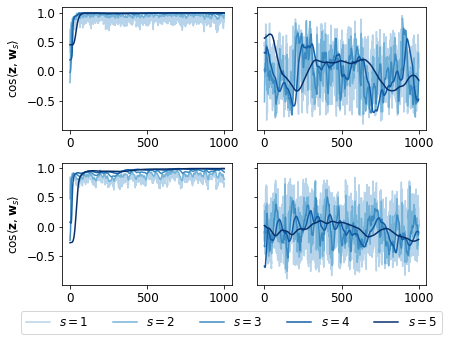

In [14]:

neuron = og_ou[0]
cm_section = np.linspace(0.3, 1, neuron.S)
sigma_s, epsilon, sigma_y, tau_y = env_extract(neuron)
colors = [ cm.Blues(x) for x in cm_section ]

fig, axs = plt.subplots(len(tau_y), len(epsilon), squeeze=True, figsize=(3*len(epsilon),2.25*len(tau_y)), sharey=True)

for log in neuron.logs:
    i = tau_y.index(log.env_parameters['tau_y'])
    j = epsilon.index(log.env_parameters['epsilon'])
    # x_low = blocks[0] * tau_y[i]
    # x_up = blocks[1] * tau_y[i]
    for k in np.arange(0, neuron.S, 1):
        if i == 0 and j == 0:        
            axs[i, j].plot(
                log.timeline, 
                (log.W[:, [k], :] @ log.z / (np.sqrt(log.W[:, [k], :] @ np.transpose(log.W[:, [k], :], (0,2,1))) * np.sqrt(np.transpose(log.z, (0,2,1)) @ log.z))).squeeze(), 
                # (neuron.po.T[None, :, :] @ log.W @ log.z / (np.sqrt(neuron.po.T[None, :, :] @ log.W @ np.transpose(neuron.po.T[None, :, :] @ log.W, (0,2,1))) * np.sqrt(np.transpose(log.z, (0,2,1)) @ log.z))).squeeze(),
                color = colors[k],
                label = '$s={k}$'.format(k=k+1)
            )
        else:
            axs[i, j].plot(
                log.timeline, 
                (log.W[:, [k], :] @ log.z / (np.sqrt(log.W[:, [k], :] @ np.transpose(log.W[:, [k], :], (0,2,1))) * np.sqrt(np.transpose(log.z, (0,2,1)) @ log.z))).squeeze(), 
                # (neuron.po.T[None, :, :] @ log.W @ log.z / (np.sqrt(neuron.po.T[None, :, :] @ log.W @ np.transpose(neuron.po.T[None, :, :] @ log.W, (0,2,1))) * np.sqrt(np.transpose(log.z, (0,2,1)) @ log.z))).squeeze(),
                color = colors[k],
            )
    
    # axs[i, j].set_xlim(x_low, x_up)
    if j == 0:
        axs[i, j].set_ylabel('$\cos\langle\mathbf{{z}},\mathbf{{w}}_s\\rangle$')
        # if i == 0:
        #     axs[i, j].legend(loc="upper left")
        # if i == 1:
        #     axs[i, j].legend(loc='upper center', bbox_to_anchor=(1, -0.05),
        #         fancybox=True, shadow=False, ncol=5)


# colors = [ cm.Oranges(x) for x in cm_section ]
# neuron = og_block[0]
# sigma_s, epsilon, sigma_y, tau_y = env_extract(neuron)

# for log in neuron.logs:
#     i = tau_y.index(log.env_parameters['tau_y'])
#     j = epsilon.index(log.env_parameters['epsilon'])
#     # x_low = blocks[0] * tau_y[i]
#     # x_up = blocks[1] * tau_y[i]
#     for k in np.arange(0, neuron.S, 1):
#         if i == 0 and j == 0:        
#             axs[i, j].plot(
#                 log.timeline, 
#                 (log.W[:, [k], :] @ log.z / (np.sqrt(log.W[:, [k], :] @ np.transpose(log.W[:, [k], :], (0,2,1))) * np.sqrt(np.transpose(log.z, (0,2,1)) @ log.z))).squeeze(), 
#                 # (neuron.po.T[None, :, :] @ log.W @ log.z / (np.sqrt(neuron.po.T[None, :, :] @ log.W @ np.transpose(neuron.po.T[None, :, :] @ log.W, (0,2,1))) * np.sqrt(np.transpose(log.z, (0,2,1)) @ log.z))).squeeze(),
#                 color = colors[k],
#                 label = 'Discrete'
#             )
#         else:
#             axs[i, j].plot(
#                 log.timeline, 
#                 (log.W[:, [k], :] @ log.z / (np.sqrt(log.W[:, [k], :] @ np.transpose(log.W[:, [k], :], (0,2,1))) * np.sqrt(np.transpose(log.z, (0,2,1)) @ log.z))).squeeze(), 
#                 # (neuron.po.T[None, :, :] @ log.W @ log.z / (np.sqrt(neuron.po.T[None, :, :] @ log.W @ np.transpose(neuron.po.T[None, :, :] @ log.W, (0,2,1))) * np.sqrt(np.transpose(log.z, (0,2,1)) @ log.z))).squeeze(),
#                 color = colors[k],
#             )
#     axs[i, j].set_xlabel('$t$')
#     axs[i, j].set_title('$\\tau_y = {}$, $\epsilon = {}$'.format(tau_y[i], epsilon[j]), fontsize=12)
    
#     # tag_R_E(axs[i, j], log, x_low, x_up)
    
#     # axs[i, j].set_xlim(x_low, x_up)
#     if j == 0:
#         axs[i, j].set_ylabel('$\cos\langle\mathbf{{z}},\mathbf{{w}}\\rangle$')
#         # if i == 0:
#         #     axs[i, j].legend(loc="upper left")


fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0.04),
          fancybox=True, shadow=False, ncol=5)

fig.tight_layout()
plt.show()


Accidentally wiped out a lot of unsaved changes, but figures needed should all have be saved.

## 5.4

In [2]:
with open('../final_data/og_complex_example_all_default_block-0.pkl', 'rb') as f:
    og_block = pickle.load(f)

In [36]:
with open('../final_data/complex_block_example_new27-15.pkl', 'rb') as f:
    og_block = pickle.load(f)

In [38]:
og_block

[Properties: {'N': 10, 'S': 5, 'tau_W': 1, 'beta': 1, 'gamma': 1, 'phi': -0.5, 'psi': 10, 'n_C': 2, 'n_g': 2, 'alpha': 1}.
 Trials: 
 0: {'sigma_s': 1, 'epsilon': 0.05, 'sigma_y': 1, 'tau_u': 0.1, 'tau_y': 2, 'tau_z': None, 'u_mode': 'block', 'y_mode': 'block', 'z_mode': 'block', 'T': 1000, 'dt': 0.002}. 
 1: {'sigma_s': 1, 'epsilon': 0.05, 'sigma_y': 1, 'tau_u': 0.1, 'tau_y': 10, 'tau_z': None, 'u_mode': 'block', 'y_mode': 'block', 'z_mode': 'block', 'T': 1000, 'dt': 0.002}. 
 2: {'sigma_s': 1, 'epsilon': 1, 'sigma_y': 1, 'tau_u': 0.1, 'tau_y': 2, 'tau_z': None, 'u_mode': 'block', 'y_mode': 'block', 'z_mode': 'block', 'T': 1000, 'dt': 0.002}. 
 3: {'sigma_s': 1, 'epsilon': 1, 'sigma_y': 1, 'tau_u': 0.1, 'tau_y': 10, 'tau_z': None, 'u_mode': 'block', 'y_mode': 'block', 'z_mode': 'block', 'T': 1000, 'dt': 0.002}. ]

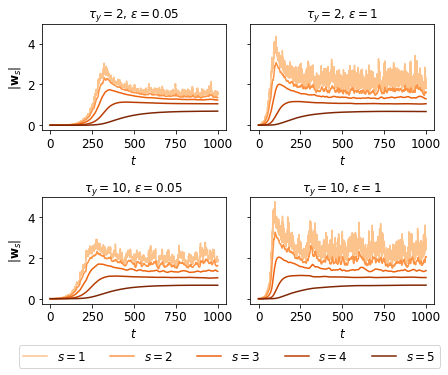

In [37]:

blocks=(0,30)


neuron = og_block[0]
sigma_s, epsilon, sigma_y, tau_y = env_extract(neuron)
cm_section = np.linspace(0.3, 1, neuron.S)


fig, axs = plt.subplots(len(tau_y), len(epsilon), squeeze=True, figsize=(3.2*len(epsilon),2.25*len(tau_y)+0.5), sharey=True)



colors = [ cm.Oranges(x) for x in cm_section ]

for log in neuron.logs:
    i = tau_y.index(log.env_parameters['tau_y'])
    j = epsilon.index(log.env_parameters['epsilon'])
    x_low = blocks[0] * tau_y[i]
    x_up = blocks[1] * tau_y[i]
    for k in np.arange(0, neuron.S, 1):
        if i == 0 and j == 0:        
            axs[i, j].plot(
                log.timeline, 
                (np.sqrt(log.W[:, [k], :] @ np.transpose(log.W[:, [k], :], (0,2,1)))).squeeze(), 
                # (neuron.po.T[None, :, :] @ log.W @ log.y / (np.sqrt(neuron.po.T[None, :, :] @ log.W @ np.transpose(neuron.po.T[None, :, :] @ log.W, (0,2,1))) * np.sqrt(np.transpose(log.y, (0,2,1)) @ log.y))).squeeze(),
                color = colors[k],
                label = '$s={k}$'.format(k=k+1)
            )
        else:
            axs[i, j].plot(
                log.timeline, 
                (np.sqrt(log.W[:, [k], :] @ np.transpose(log.W[:, [k], :], (0,2,1)))).squeeze(), 
                # (neuron.po.T[None, :, :] @ log.W @ log.y / (np.sqrt(neuron.po.T[None, :, :] @ log.W @ np.transpose(neuron.po.T[None, :, :] @ log.W, (0,2,1))) * np.sqrt(np.transpose(log.y, (0,2,1)) @ log.y))).squeeze(),
                color = colors[k],
            )
    axs[i, j].set_xlabel('$t$')
    axs[i, j].set_title('$\\tau_y = {}$, $\epsilon = {}$'.format(tau_y[i], epsilon[j]), fontsize=12)
    
    # tag_R_E(axs[i, j], log, x_low, x_up)
    
    # axs[i, j].set_xlim(0, 500)
    if j == 0:
        axs[i, j].set_ylabel('$| \mathbf{{w}}_s |$')
        # if i == 0:
        #     axs[i, j].legend(loc="upper left")



fig.legend(loc='upper center', bbox_to_anchor=(0.51, 0.04),
          fancybox=True, shadow=False, ncol=5)

fig.tight_layout()
plt.show()

In [32]:
fig.savefig('../final_figure/og_norm_block.pdf', bbox_inches='tight')

In [39]:
fig.savefig('../final_figure/-0.5_10_norm_block.pdf', bbox_inches='tight')